In [ ]:
### VARIABLES
LIG = "UNL"
nombre_archivo = 'CPsInfo_santolina.txt'
pdb_file = 'santolina_rep.c0_red_CAP.pdb'
molecule="filtered_"+LIG

In [ ]:
from google.colab import drive

# Montar Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os

os.chdir('/content/drive/MyDrive/Qtaim_residuos')

# Obtener la ruta de la carpeta actual
ruta_actual = os.getcwd()

# Reemplazar parte de la ruta con la nueva carpeta
carpeta_nueva = "nueva_carpeta"
ruta_nueva = ruta_actual.replace("carpeta_actual", carpeta_nueva)

# Cambiar el directorio actual a la nueva ruta
os.chdir(ruta_nueva)

In [ ]:
def process_dataframe(df,Lig):
  # Iterar sobre las filas del DataFrame
  for index, row in df.iterrows():
      j = row[3]
      k = row[9]
      if j == k:
          # Eliminar la fila que cumple la condición
          df = df.drop(index)

  # Restablecer los índices del DataFrame después de eliminar las filas
  df = df.reset_index(drop=True)

  column_names = ['Col0', 'Col1', 'Col2', 'Col3', 'Col4', 'Col5', 'Col6', 'Col7', 'Col8', 'Col9', 'Col10', 'Col11', 'Col12', 'Col13']
  rearange_df = pd.DataFrame(columns=column_names)

  for i in range(len(df[0])):
      j = df.iloc[i, 3]
      if j == Lig:
          col0 = df.iloc[i, 6]
          col1 = df.iloc[i, 7]
          col2 = df.iloc[i, 8]
          col3 = df.iloc[i, 9]
          col4 = df.iloc[i, 10]
          col5 = df.iloc[i, 5]
          col6 = df.iloc[i, 0]
          col7 = df.iloc[i, 1]
          col8 = df.iloc[i, 2]
          col9 = df.iloc[i, 3]
          col10 = df.iloc[i, 4]
          col11 = df.iloc[i, 11]
          col12 = df.iloc[i, 12]
          col13 = df.iloc[i, 13]

          row = [col0, col1, col2, col3, col4, col5, col6, col7, col8, col9, col10, col11, col12, col13]
          rearange_df.loc[len(rearange_df)] = row
      else:
          col0 = df.iloc[i, 0]
          col1 = df.iloc[i, 1]
          col2 = df.iloc[i, 2]
          col3 = df.iloc[i, 3]
          col4 = df.iloc[i, 4]
          col5 = df.iloc[i, 5]
          col6 = df.iloc[i, 6]
          col7 = df.iloc[i, 7]
          col8 = df.iloc[i, 8]
          col9 = df.iloc[i, 9]
          col10 = df.iloc[i, 10]
          col11 = df.iloc[i, 11]
          col12 = df.iloc[i, 12]
          col13 = df.iloc[i, 13]
          row = [col0, col1, col2, col3, col4, col5, col6, col7, col8, col9, col10, col11, col12, col13]
          rearange_df.loc[len(rearange_df)] = row

  rearange_df.reset_index(drop=True, inplace=True)
  df2 = rearange_df.drop("Col5", axis=1)
  # Verificar duplicados en todas las columnas
  duplicates = df2.duplicated()

  # Obtener índices de filas duplicadas
  duplicate_indices = df2[duplicates].index

  # Eliminar filas duplicadas
  df2 = df2.drop(duplicate_indices)

  # Restablecer los índices del DataFrame después de eliminar las filas duplicadas
  df2 = df2.reset_index(drop=True)
  return df2

In [ ]:
import pandas as pd

In [ ]:
#nombre_archivo = 'CPsInfo_ibp.txt'

# Dividir el nombre del archivo usando el carácter '_'
split_nombre = nombre_archivo.split('_')
split_nombre = split_nombre[1]
split_nombre = split_nombre.split(".")
# Seleccionar el elemento después del '_' y antes de '.txt'
name_file = split_nombre[0]

print(name_file)

santolina


In [ ]:
#LIG = "IBP"   #### MODIFICAR

In [ ]:
# Leer el archivo en un DataFrame de pandas
df = pd.read_csv(nombre_archivo, delimiter='\t', header=None)
df2=process_dataframe(df,LIG) #cambiar nombre Lig
df2.head()

,Col0,Col1,Col2,Col3,Col4,Col6,Col7,Col8,Col9,Col10,Col11,Col12,Col13
0,42,O,203,ALA,192,74,H,260,UNL,309,0.004885,0.018720,0.027013
1,46,H,209,ARG,193,75,H,265,UNL,309,0.005027,0.016695,0.024666
2,55,H,210,ARG,193,91,H,261,UNL,309,0.005581,0.020785,0.030265
3,89,N,223,ARG,193,75,H,265,UNL,309,0.003464,0.011780,0.016384
4,77,H,180,PHE,189,91,H,261,UNL,309,0.001866,0.006147,0.008657


In [ ]:
def interactions_detector(df):
  import seaborn as sns
  import matplotlib.pyplot as plt

  heatmap_data = []

  for i in range(len(df)):
      interaction1 = str(df.iloc[i, 2]) + " " + str(df.iloc[i, 1]) + " " + str(df.iloc[i, 3]) + str(df.iloc[i, 4])
      interaction2 = str(df.iloc[i, 7]) + " " + str(df.iloc[i, 6])
      rho = str(df.iloc[i, 11])
      heatmap_data.append([interaction1, interaction2,rho])

  heatmap_df = pd.DataFrame(heatmap_data, columns=['Interaction1', 'Interaction2','rho'])
  return(heatmap_df)

In [ ]:
heatmap_df=interactions_detector(df2)
heatmap_df

,Interaction1,Interaction2,rho
0,203 O ALA192,260 H,0.01872
1,209 H ARG193,265 H,0.016695
2,210 H ARG193,261 H,0.020785
3,223 N ARG193,265 H,0.01178
4,180 H PHE189,261 H,0.006147
5,24 H GLY43,263 H,0.012419
6,24 H GLY43,243 C,0.027369
7,220 N ARG193,241 C,0.007293
8,49 H VAL50,259 H,0.008305
9,182 C PHE189,250 H,0.014176


In [ ]:
columna = 'rho'
top_3_valores = heatmap_df.sort_values(columna, ascending=False).head(10)

top_3_valores

,Interaction1,Interaction2,rho
18,163 H LEU177,254 H,0.030596
15,76 H ASP124,252 H,0.029677
11,186 C PHE189,253 H,0.028331
6,24 H GLY43,243 C,0.027369
14,7 H LEU42,256 H,0.027153
12,185 H PHE189,258 H,0.025675
2,210 H ARG193,261 H,0.020785
0,203 O ALA192,260 H,0.01872
1,209 H ARG193,265 H,0.016695
9,182 C PHE189,250 H,0.014176


In [ ]:
valores_primera_columna = top_3_valores.iloc[:, 0].tolist()

print(valores_primera_columna)

['163 H LEU177', '76 H ASP124', '186 C PHE189', '24 H GLY43', '7 H LEU42', '185 H PHE189', '210 H ARG193', '203 O ALA192', '209 H ARG193', '182 C PHE189']


In [ ]:
import re

resultado_busqueda1 = []

for valor in valores_primera_columna:
    partes = re.split(r'(?<=[a-zA-Z])(?=\d)', valor)
    #resultado_busqueda1.append(f"{partes[0][-3:]}   {int(partes[1]) - 1}")
    resultado_busqueda1.append(f"{partes[0][-3:]}   {int(partes[1])}")

print(resultado_busqueda1)

['LEU   177', 'ASP   124', 'PHE   189', 'GLY   43', 'LEU   42', 'PHE   189', 'ARG   193', 'ALA   192', 'ARG   193', 'PHE   189']


In [ ]:
import re

resultado_busqueda2 = []

for valor in valores_primera_columna:
    partes = re.split(r'(?<=[a-zA-Z])(?=\d)', valor)
    #resultado_busqueda2.append(f"{partes[0][-3:]}    {int(partes[1]) - 1}")
    resultado_busqueda2.append(f"{partes[0][-3:]}    {int(partes[1])}")

print(resultado_busqueda2)

['LEU    177', 'ASP    124', 'PHE    189', 'GLY    43', 'LEU    42', 'PHE    189', 'ARG    193', 'ALA    192', 'ARG    193', 'PHE    189']


In [ ]:
import re

ultimos_valores = []

for valor in valores_primera_columna:
    match = re.search(r'\d+$', valor)
    if match:
        ultimos_valores.append(int(match.group()))

print(ultimos_valores)

[177, 124, 189, 43, 42, 189, 193, 192, 193, 189]


In [ ]:
valor_a_restar = 1

resultados_resta = [valor - valor_a_restar for valor in ultimos_valores]

print(resultados_resta)

[176, 123, 188, 42, 41, 188, 192, 191, 192, 188]


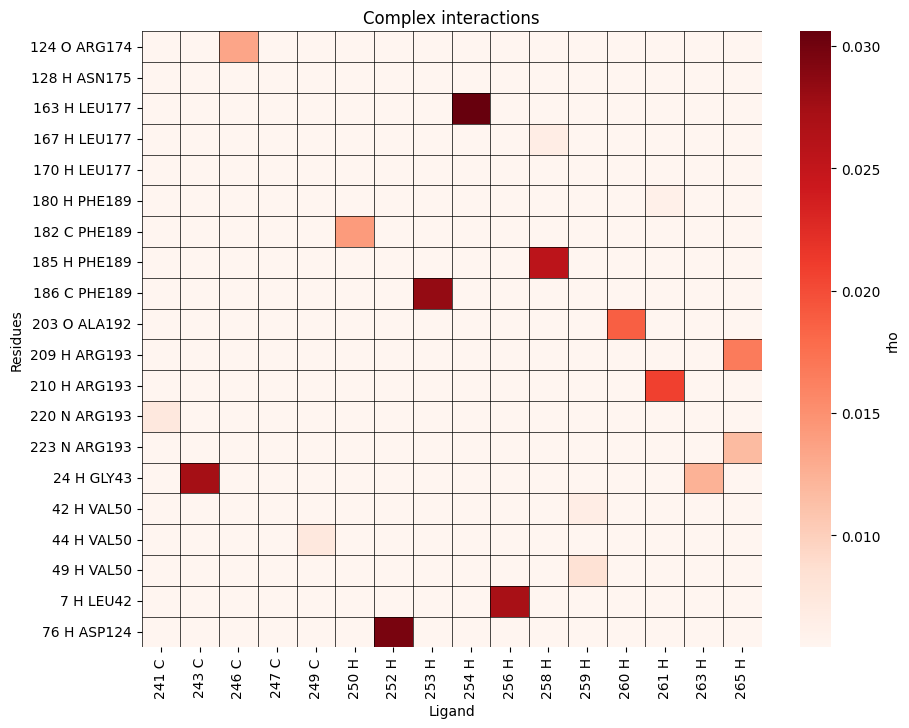

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convertir la columna 'rho' a tipo numérico
heatmap_df['rho'] = pd.to_numeric(heatmap_df['rho'], errors='coerce')

# Crear matriz de valores de rho para pares de interacciones
heatmap_matrix = heatmap_df.pivot_table(index='Interaction1', columns='Interaction2', values='rho').fillna(0)

# Crear heatmap con la escala de color basada en 'rho'
plt.figure(figsize=(10, 8))
ax = sns.heatmap(heatmap_matrix, cmap="Reds", cbar=True, vmin=heatmap_df['rho'].min(), vmax=heatmap_df['rho'].max(), cbar_kws={'label': 'rho'})
plt.title('Complex interactions')
plt.xlabel('Ligand')
plt.ylabel('Residues')

# Rotar el texto del label del eje x a 90 grados
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

# Agregar líneas verticales y horizontales
for i in range(len(heatmap_matrix)):
    ax.axhline(i, color='black', lw=0.5)
    ax.axvline(i, color='black', lw=0.5)

# Guardar la imagen recortada como PDF
plt.savefig('heatmap_QTAIM_rho_residues_'+name_file+'.pdf', format='pdf', bbox_inches='tight')

# Mostrar el gráfico en pantalla
plt.show()

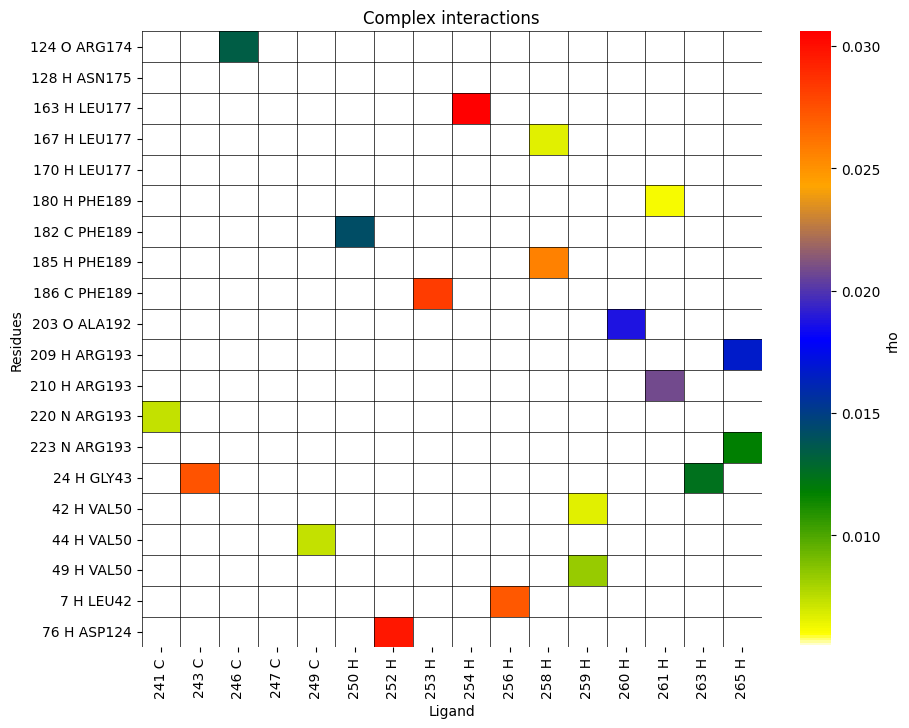

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Crear la escala de color personalizada
colors = [(0.0, 'white'), (0.02, 'yellow'), (0.25, 'green'), (0.5, 'blue'), (0.75, 'orange'), (1.0, 'red')]
custom_cmap = mcolors.LinearSegmentedColormap.from_list('CustomMap', colors)

# Convertir la columna 'rho' a tipo numérico
heatmap_df['rho'] = pd.to_numeric(heatmap_df['rho'], errors='coerce')

# Crear matriz de valores de rho para pares de interacciones
heatmap_matrix = heatmap_df.pivot_table(index='Interaction1', columns='Interaction2', values='rho').fillna(0)

# Crear heatmap con la escala de color personalizada basada en 'rho'
plt.figure(figsize=(10, 8))
ax = sns.heatmap(heatmap_matrix, cmap=custom_cmap, cbar=True, vmin=heatmap_df['rho'].min(), vmax=heatmap_df['rho'].max(), cbar_kws={'label': 'rho'},annot=False)
plt.title('Complex interactions')
plt.xlabel('Ligand')
plt.ylabel('Residues')

# Rotar el texto del label del eje x a 90 grados
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

# Agregar líneas verticales y horizontales
for i in range(len(heatmap_matrix)):
    ax.axhline(i, color='black', lw=0.5)
    ax.axvline(i, color='black', lw=0.5)

# Guardar la imagen recortada como PDF
plt.savefig('heatmap_QTAIM_rho_residues_' + name_file + '.pdf', format='pdf', bbox_inches='tight')

# Mostrar el gráfico en pantalla
plt.show()

# ***Visualización***

In [ ]:
!pip install py3Dmol

In [ ]:
resultados_totales = resultado_busqueda1 + resultado_busqueda2

In [ ]:
#pdb_file = 'ibp_red_cap.pdb'

# Leer el archivo PDB como un archivo de texto y filtrar las líneas que contengan los valores de ultimos_valores y la cadena "DIF"
with open(pdb_file, 'r') as file:
    lines = [line for line in file if any(str(valor) in line for valor in resultados_totales ) or  LIG in line]

# Unir las líneas filtradas nuevamente en un solo string
filtered_pdb_text = ''.join(lines)

In [ ]:
filtered_pdb_text

'SHEET    1   1 1 LEU    42  ALA    44  0\nATOM      1  N   LEU    42      63.141  39.800  38.001                       N\nATOM      2  H   LEU    42      62.779  39.071  37.420                       H\nATOM      3  CA  LEU    42      62.247  40.807  38.543                       C\nATOM      4  HA  LEU    42      62.865  41.640  38.879                       H\nATOM      5  CB  LEU    42      61.488  41.466  37.470                       C\nATOM      6  HB2 LEU    42      60.743  40.741  37.140                       H\nATOM      7  HB3 LEU    42      60.845  42.207  37.945                       H\nATOM      8  CG  LEU    42      62.279  42.129  36.377                       C\nATOM      9  HG  LEU    42      63.015  41.508  35.867                       H\nATOM     10  CD1 LEU    42      61.317  42.713  35.377                       C\nATOM     11 HD11 LEU    42      60.816  41.880  34.884                       H\nATOM     12 HD12 LEU    42      60.704  43.460  35.881                       

In [ ]:
output_file = 'filtered_'+LIG
output_file_pdb= output_file+".pdb"

with open(output_file_pdb, "w") as file:
    file.write(filtered_pdb_text)

print(f"El archivo PDB '{output_file_pdb}' se ha guardado exitosamente.")

El archivo PDB 'filtered_UNL.pdb' se ha guardado exitosamente.


In [ ]:
import py3Dmol
view = py3Dmol.view(width=600, height=600)
view.addModel(filtered_pdb_text, 'pdb')
# Establecer estilo para ocultar átomos de hidrógeno
view.addStyle({'stick': {}})
view.addStyle({'resn':LIG}, {'stick': {'colorscheme':'orangeCarbon'}})
view.addStyle({'atom':"H"}, {'stick': {'colorscheme':'greenCarbon'}})
view.zoomTo()
view.show()

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

In [ ]:
!wget https://repo.anaconda.com/miniconda/Miniconda2-latest-Linux-x86_64.sh
!bash Miniconda2-latest-Linux-x86_64.sh -bfp /usr/local
!source /usr/local/etc/profile.d/conda.sh


--2024-01-31 00:37:09--  https://repo.anaconda.com/miniconda/Miniconda2-latest-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.131.3, 104.16.130.3, 2606:4700::6810:8203, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.131.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 51093759 (49M) [application/x-sh]
Saving to: ‘Miniconda2-latest-Linux-x86_64.sh.3’

Miniconda2-latest-L 100%[===================>]  48.73M  38.1MB/s    in 1.3s    

2024-01-31 00:37:11 (38.1 MB/s) - ‘Miniconda2-latest-Linux-x86_64.sh.3’ saved [51093759/51093759]

PREFIX=/usr/local
Unpacking payload ...

CondaError: KeyboardInterrupt

/bin/bash: line 1: /usr/local/etc/profile.d/conda.sh: No such file or directory


In [ ]:
!conda create -y -n myenv python=2.7

/bin/bash: line 1: conda: command not found


In [ ]:
%%bash
eval "$(conda shell.bash hook)"
conda activate myenv
conda install -c openbabel openbabel -y

bash: line 1: conda: command not found
bash: line 2: conda: command not found
bash: line 3: conda: command not found


CalledProcessError: Command 'b'eval "$(conda shell.bash hook)"\nconda activate myenv\nconda install -c openbabel openbabel -y\n'' returned non-zero exit status 127.

In [ ]:
%%bash
source activate myenv

molecule="filtered_UNL" # MODIFICAR

# Define las rutas de los archivos PDB y MOL2
input_file_pdb="${molecule}.pdb"
output_file_mol2="${molecule}.mol2"

obabel -ipdb "${input_file_pdb}" -omol2 -O "${output_file_mol2}"

In [ ]:
#molecule="filtered_ACD"
output_file_mol2=molecule+".mol2"
output_file_mol2

In [ ]:
file_path = output_file_mol2

with open(file_path, 'r') as file:
    filtered_data = file.read()

print(filtered_data)

In [ ]:
import py3Dmol
view = py3Dmol.view(width=600, height=600)
view.addModel(filtered_data, 'mol2')
# Establecer estilo para ocultar átomos de hidrógeno
view.addStyle({'stick': {}})
#view.addStyle( {'stick': {'colorscheme':'orangeCarbon'}})
#view.addStyle({'resn':"SER499"}, {'stick': {'colorscheme':'orangeCarbon'}})
view.addStyle({"label":{"colorscheme":"greenCarbon"}})
view.zoomTo()
view.show()

# Guardar la imagen
view.png()